In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")
%matplotlib inline

In [3]:
alerts = pd.read_csv('alerts.csv')
alerts

,ALERT_ID,ALERT_TYPE,IS_FRAUD,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP
0,193,fan_in,True,82,6976,9739,TRANSFER,4.85,0
1,377,cycle,True,949,5776,2570,TRANSFER,10.27,0
2,189,fan_in,True,6280,9999,9530,TRANSFER,2.74,1
3,377,cycle,True,7999,1089,7352,TRANSFER,10.27,1
4,130,fan_in,True,12975,7025,9708,TRANSFER,3.53,2
...,...,...,...,...,...,...,...,...,...
1714,272,cycle,True,1316271,2465,707,TRANSFER,16.31,198
1715,44,fan_in,True,1316636,1453,8709,TRANSFER,2.81,199
1716,222,cycle,True,1317852,9446,790,TRANSFER,11.64,199
1717,74,fan_in,True,1322020,6969,9529,TRANSFER,3.86,199


## TYPE OF ALERT

<AxesSubplot:title={'center':'distribution over type of alert'}, ylabel='ALERT_TYPE'>

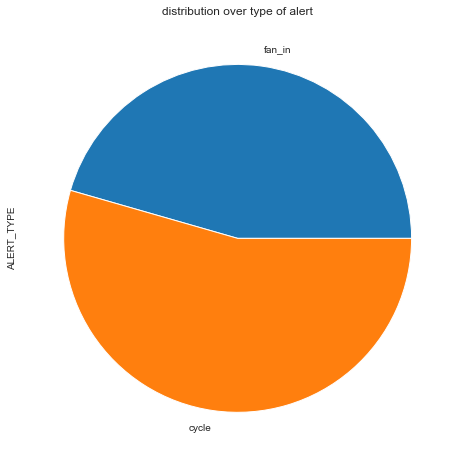

In [67]:
alerts['ALERT_TYPE'].value_counts().sort_values().plot(kind='pie',figsize=(20,8),title = "distribution over type of alert")

<AxesSubplot:>

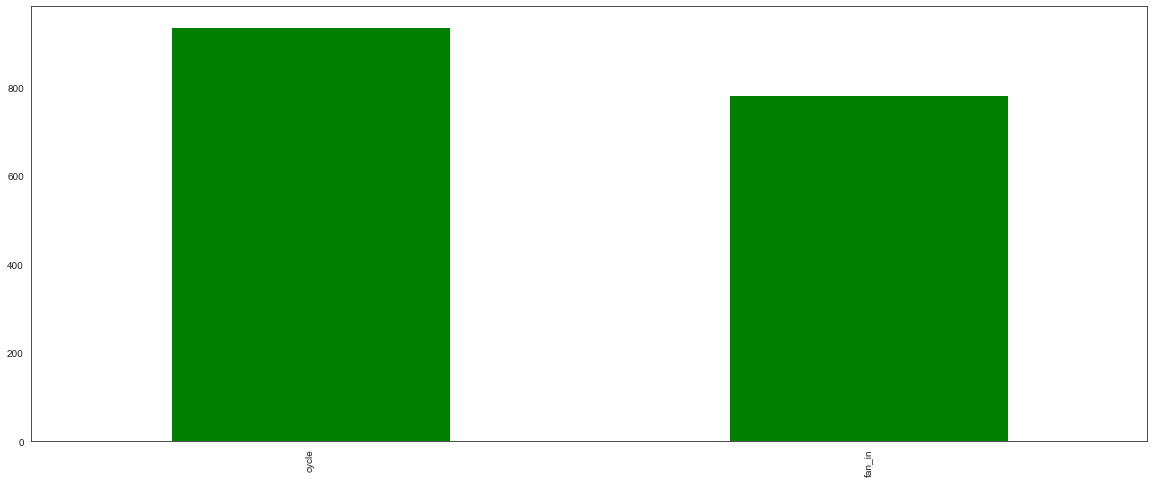

In [31]:
alerts['ALERT_TYPE'].value_counts().plot(kind='bar',figsize=(20,8),title = "",color='green')

### Top 10 Sender with most ALERTS generated

<AxesSubplot:title={'center':'ratings according to turnover'}>

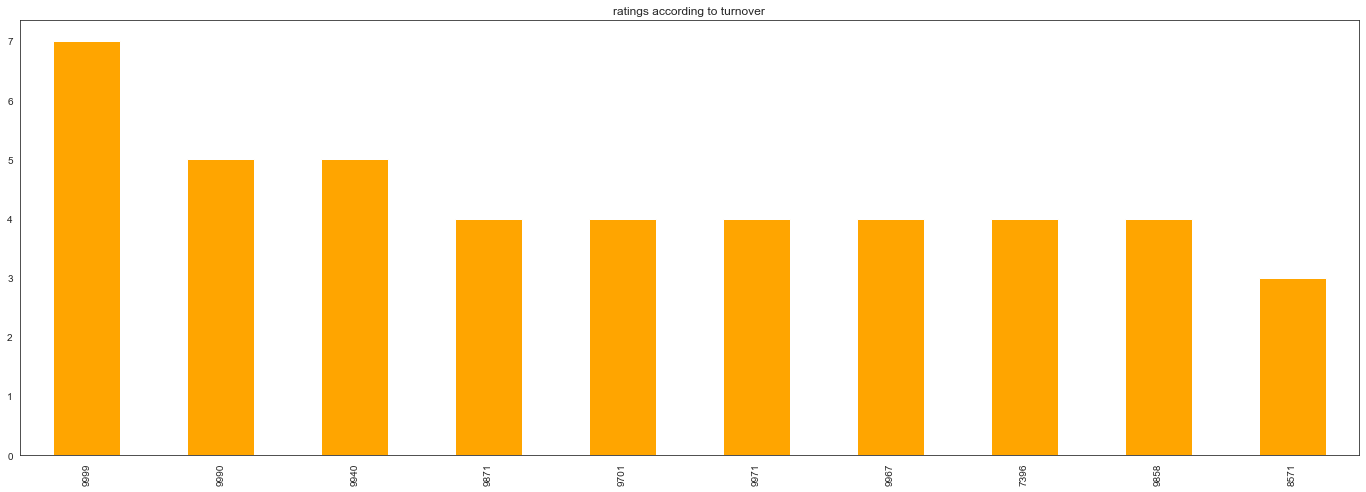

In [68]:
alerts['SENDER_ACCOUNT_ID'].value_counts().nlargest(10).plot(kind='bar',figsize=(24,8),title = "ratings according to turnover",color='orange')

<AxesSubplot:title={'center':'top most transactions with '}, xlabel='SENDER_ACCOUNT_ID,ALERT_TYPE'>

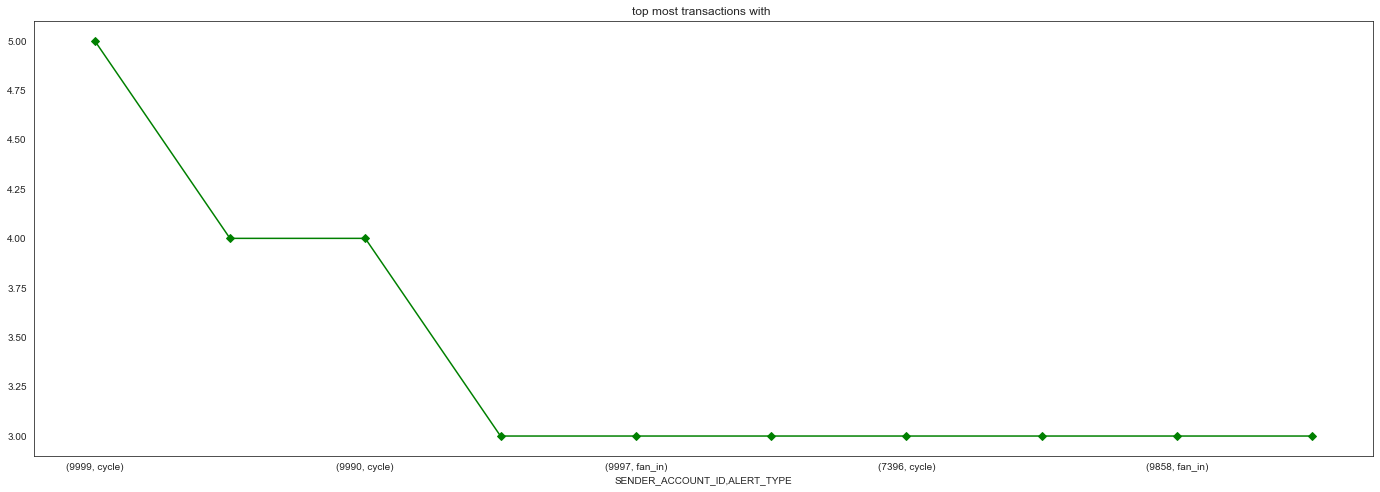

In [75]:
alerts.groupby('SENDER_ACCOUNT_ID')['ALERT_TYPE'].value_counts().sort_values().nlargest(10).plot(kind='line',figsize=(24,8),title = "top most transactions with ",color='green',marker='D')

can clearly say that all top transaction is getting alert type cyclic

In [102]:
alerts['TX_AMOUNT'].describe()

count    1719.000000
mean        9.763310
std         5.928078
min         2.540000
25%         3.780000
50%        10.600000
75%        15.300000
max        19.920000
Name: TX_AMOUNT, dtype: float64

In [95]:
#creating a function to return days quantiles
def return_TX_bins(val):
    if val < 5:
        return "Low tax applied"
    elif val < 10 :
        return "Moderate tax applied"
    elif val < 15:
        return "High Tax applied"
    else:
        return " highest range of tax"

<AxesSubplot:title={'center':'Distribution of TAX ammount applied'}>

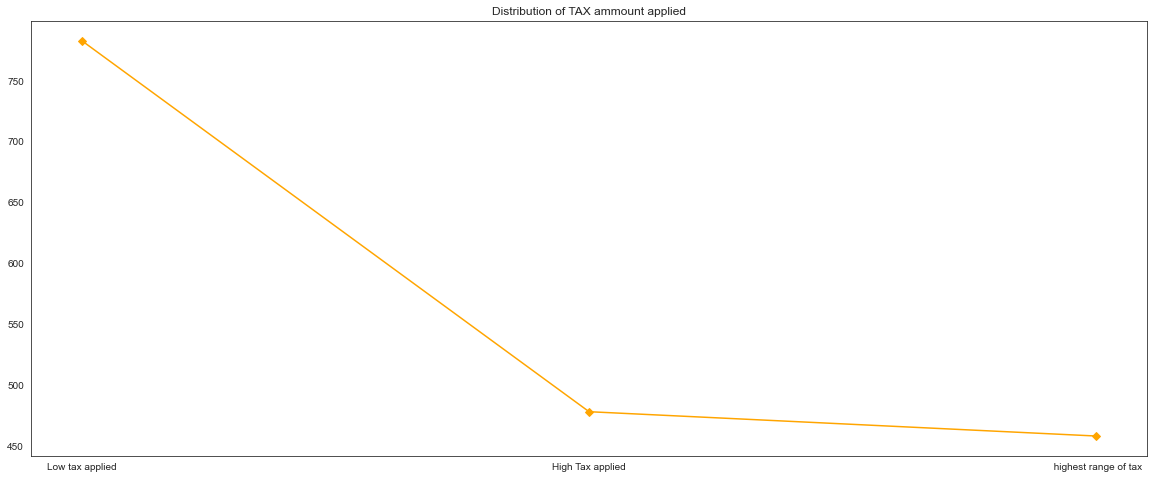

In [99]:
alerts['TX_AMOUNT'].map(return_TX_bins).value_counts().plot(kind='line', figsize=(20,8),title='Distribution of TAX ammount applied', color='orange',marker='D')

most of the time the tax applied on the transaction is less than 5
as the tax applied on a transaction get higher the no of peoples doing that kind of transaction becomes lesser.
where as from low to high amount of tax applied the no of people doing transaction changes with slop tan(-45)

### cluster according alert and TX applied

<AxesSubplot:xlabel='TX_AMOUNT', ylabel='ALERT_ID'>

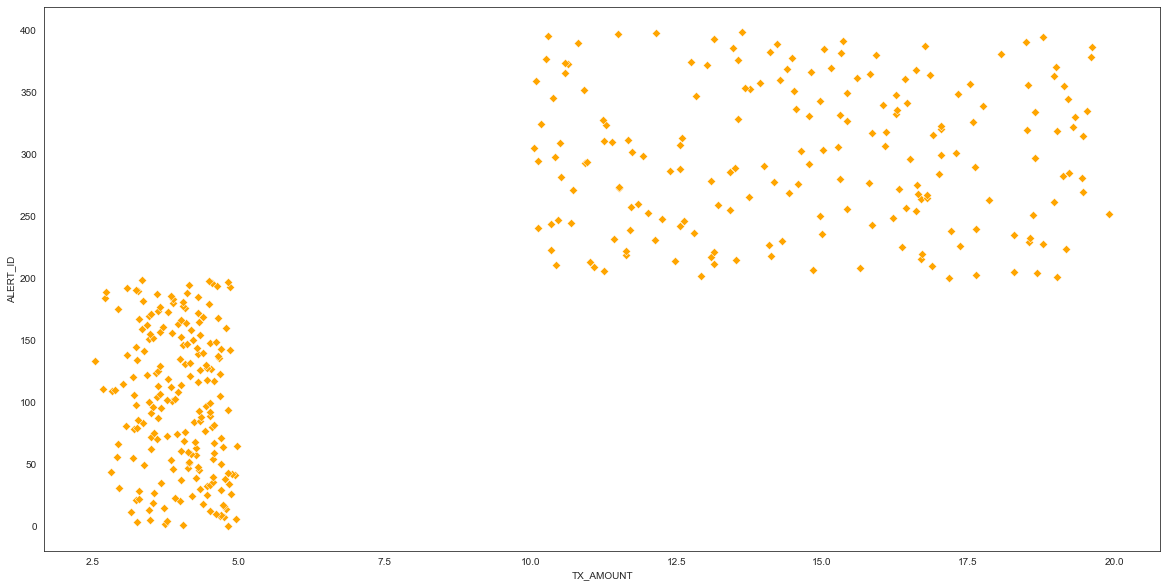

In [124]:
gr_yr = alerts.groupby(['ALERT_ID']).agg({'TX_AMOUNT':'max'})
plt.figure(figsize=(20,10))
sns.scatterplot(x=gr_yr.TX_AMOUNT,y=gr_yr.index, data=gr_yr,marker='D',color='orange')

from this it is clear that the cluster with less ammount of tax directly belongs to the the fan_in type of alert and the cluster with more ammount of tax belongs to the Cyclic type of alert

### top tx amount applied for a particular time stamp and what type of alert was there

<AxesSubplot:title={'center':'Distribution of TAX ammount applied'}, xlabel='TIMESTAMP,ALERT_TYPE'>

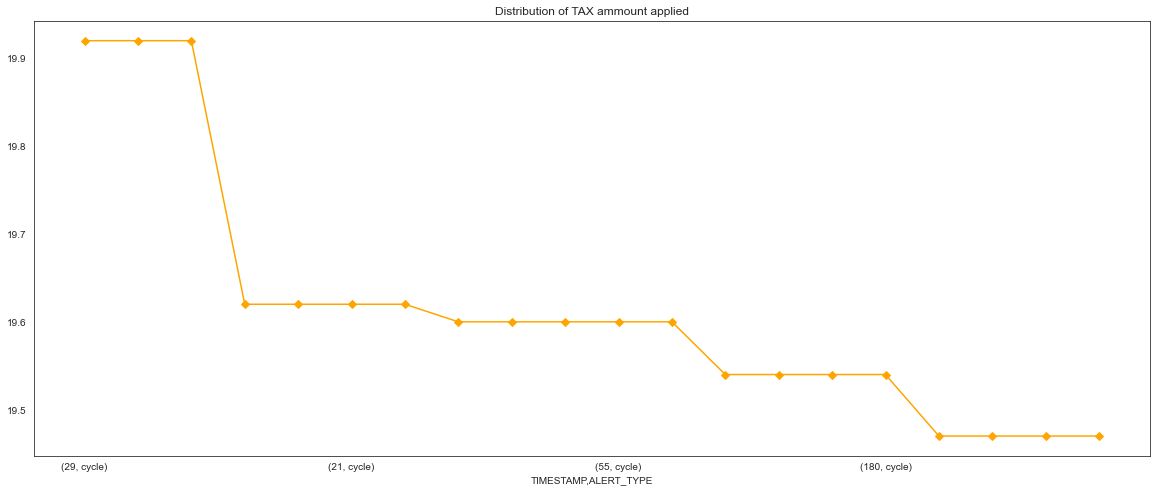

In [133]:
alerts.groupby(['TIMESTAMP','ALERT_TYPE'])['TX_AMOUNT'].max().nlargest(20).plot(kind='line', figsize=(20,8),title='Distribution of TAX ammount applied', color='orange',marker='D')

when ever tx amount applied high transaction gets the alert type of cyclic checked top 20 transactions and each time alert type shown is cyclic